In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [2]:
data=pd.read_csv('/content/credit_risk_eda.csv')

In [3]:
data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,debt_income_ratio
0,22,59000,3.0,3,35000,16.02,1,0.59,1,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.593220
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.104167
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.572917
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.534351
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.643382


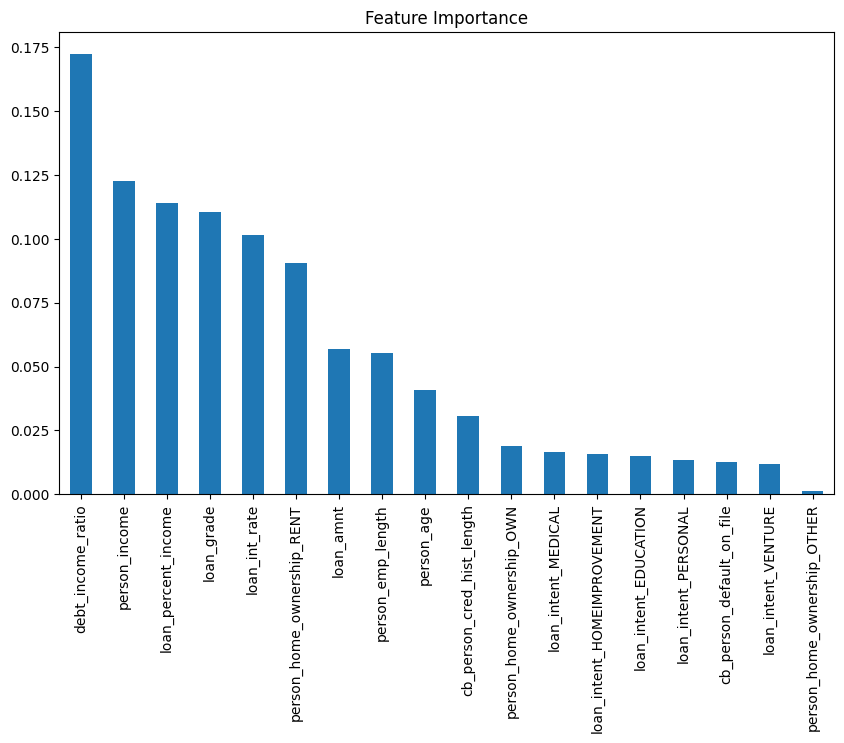

In [4]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)

# Plot feature importance
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance')
plt.show()

 The chart suggests that the model's predictions are primarily driven by financial factors related to the borrower's income, debt, and loan terms, rather than demographic or credit history information.

In [5]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9340085942295887

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5096
           1       0.97      0.72      0.83      1420

    accuracy                           0.93      6516
   macro avg       0.95      0.86      0.89      6516
weighted avg       0.94      0.93      0.93      6516



In [6]:
y_predict = model.predict(X_test)
print(confusion_matrix(y_test, y_predict))

[[5059   37]
 [ 393 1027]]


In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
    }

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:39:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [33]:
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Model Accuracy: 0.9393226235546915


Logistic Regression

In [34]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# AUC-ROC Score
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
roc_score_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)
print(f"AUC-ROC Score for Logistic Regression: {roc_score_log_reg}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7661
           1       0.73      0.17      0.28      2112

    accuracy                           0.81      9773
   macro avg       0.77      0.58      0.58      9773
weighted avg       0.79      0.81      0.76      9773

AUC-ROC Score for Logistic Regression: 0.7555805204835195


XgBoost

In [36]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# AUC-ROC Score
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"AUC-ROC Score for XGBoost: {roc_score_xgb}")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7661
           1       0.96      0.75      0.84      2112

    accuracy                           0.94      9773
   macro avg       0.95      0.87      0.90      9773
weighted avg       0.94      0.94      0.94      9773

AUC-ROC Score for XGBoost: 0.949936563784299


In [37]:
models = {
    "Random Forest": model,
    "Logistic Regression": log_reg,
    "XGBoost": xgb_model,
}

# Loop through each model to get predictions and print confusion matrix
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"Confusion Matrix for {name}:")
    print(cm)
    print("\n")

Confusion Matrix for Random Forest:
[[7270  391]
 [ 494 1618]]


Confusion Matrix for Logistic Regression:
[[7528  133]
 [1749  363]]


Confusion Matrix for XGBoost:
[[7593   68]
 [ 535 1577]]




using SMOTEENN since our target variable 'loan_status' is highly imbalanced

In [38]:
X = data.drop(columns=['loan_status'])  # Replace with your features
y = data['loan_status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTEEN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

SMOTEEN enhanced Random forest classifier

In [39]:
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the performance (you can use AUC-ROC, F1, etc.)
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))

# AUC-ROC Score
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_score}")

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7661
           1       0.77      0.75      0.76      2112

    accuracy                           0.90      9773
   macro avg       0.85      0.85      0.85      9773
weighted avg       0.90      0.90      0.90      9773

AUC-ROC Score: 0.9194026933939315


Logistic Regression

In [48]:
log_regs = LogisticRegression(random_state=42)
log_regs.fit(X_resampled, y_resampled)

# Predictions
y_pred_log_reg = log_regs.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# AUC-ROC Score
y_pred_prob_log_reg = log_regs.predict_proba(X_test)[:, 1]
roc_score_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)
print(f"AUC-ROC Score for Logistic Regression: {roc_score_log_reg}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      7661
           1       0.42      0.77      0.55      2112

    accuracy                           0.72      9773
   macro avg       0.67      0.74      0.67      9773
weighted avg       0.81      0.72      0.74      9773

AUC-ROC Score for Logistic Regression: 0.8089404891164615


XgBoost

In [65]:
xgb_models = xgb.XGBClassifier(max_depth=10, n_estimators=300, scale_pos_weight=4, learning_rate=0.3)
xgb_models.fit(X_resampled, y_resampled)

# Predictions
y_pred_xgb = xgb_models.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# AUC-ROC Score
y_pred_prob_xgb = xgb_models.predict_proba(X_test)[:, 1]
roc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"AUC-ROC Score for XGBoost: {roc_score_xgb}")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7661
           1       0.77      0.79      0.78      2112

    accuracy                           0.91      9773
   macro avg       0.86      0.86      0.86      9773
weighted avg       0.91      0.91      0.91      9773

AUC-ROC Score for XGBoost: 0.9321672849596342


In [66]:
models = {
    "Random Forest": rf_model,
    "Logistic Regression": log_regs,
    "XGBoost": xgb_models,
}

# Loop through each model to get predictions and print confusion matrix
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"Confusion Matrix for {name}:")
    print(cm)
    print("\n")

Confusion Matrix for Random Forest:
[[7198  463]
 [ 519 1593]]


Confusion Matrix for Logistic Regression:
[[5430 2231]
 [ 484 1628]]


Confusion Matrix for XGBoost:
[[7173  488]
 [ 439 1673]]




In [71]:
import pickle

# Save model using pickle
with open('Credit_Risk_XgB_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [68]:
load_model = pickle.load(open('Credit_Risk_XgB_model.pkl', 'rb'))

In [69]:
model_score_r1 = load_model.score(X_resampled, y_resampled)

In [70]:
model_score_r1

1.0